## K Nearest Neighbour Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
df = pd.read_csv('Classified Data-Copy1', index_col = 0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

<Figure size 360x360 with 0 Axes>

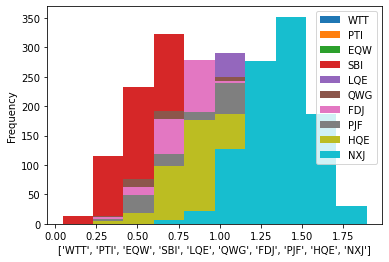

In [5]:
plt.figure(figsize=(5,5))
for names in [['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']]:
    df[names].plot(kind='hist')
    plt.xlabel(names)
    plt.show()

<AxesSubplot:>

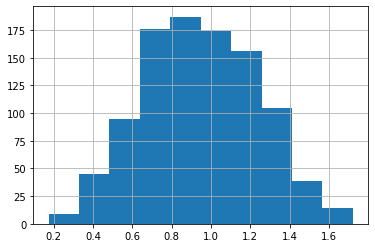

In [6]:
df['WTT'].hist()

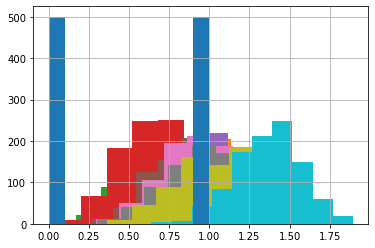

In [7]:
for names in df.columns:
    df[names].hist()

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
Scalar = StandardScaler()

In [10]:
scaled_features = Scalar.fit_transform(df.drop('TARGET CLASS', axis = 1))

In [11]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [12]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [13]:
data = df_feat
target = df['TARGET CLASS']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=101)

In [16]:
len(X_train)

800

In [17]:
len(y_test)

200

In [18]:
y_train.head(2)

423    0
157    0
Name: TARGET CLASS, dtype: int64

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
KNN = KNeighborsClassifier(n_neighbors=1)

In [21]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Classification Report and Confusion Matrics

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
y_pred = KNN.predict(X_test)

In [24]:
len(y_pred)

200

In [25]:
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Metrics:\n', cm)
print ('Classification Report:\n', classification_report(y_test, y_pred))

Confusion Metrics:
 [[99  7]
 [ 9 85]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       106
           1       0.92      0.90      0.91        94

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



In [26]:
import warnings
warnings.simplefilter("ignore")

#### Evaluating Model with different number of neighbours

In [27]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

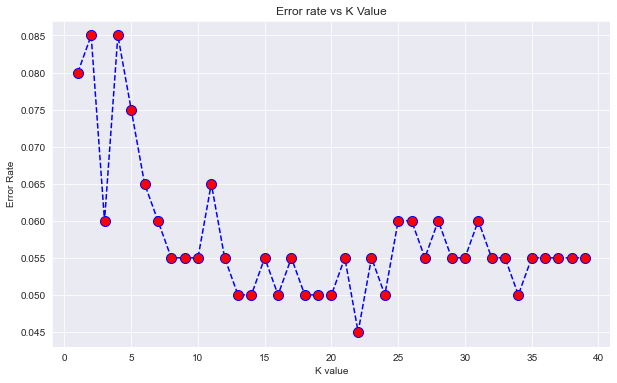

In [28]:
sn.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', marker = 'o', 
        markerfacecolor = 'red', markersize = 10)
plt.title('Error rate vs K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

#### Checking Accuracy with k = 22

In [29]:
KNn = KNeighborsClassifier(n_neighbors=22)
KNn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=22)

In [30]:
y_pred_22 = KNn.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred_22))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       106
           1       0.96      0.95      0.95        94

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



In [32]:
confusion_matrix(y_test, y_pred_22)

array([[102,   4],
       [  5,  89]], dtype=int64)

Text(34.0, 0.5, 'Actual')

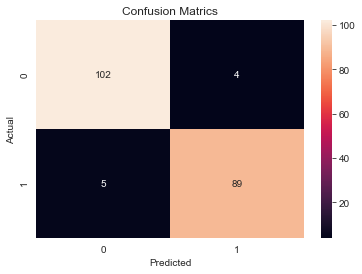

In [33]:
sn.heatmap(confusion_matrix(y_test, y_pred_22), annot = True, fmt = 'g')
plt.title('Confusion Matrics')
plt.xlabel('Predicted')
plt.ylabel('Actual')